# <font color="#114b98">      <div align="center">   Classez des images à l'aide d'algorithmes de Deep Learning
    
    

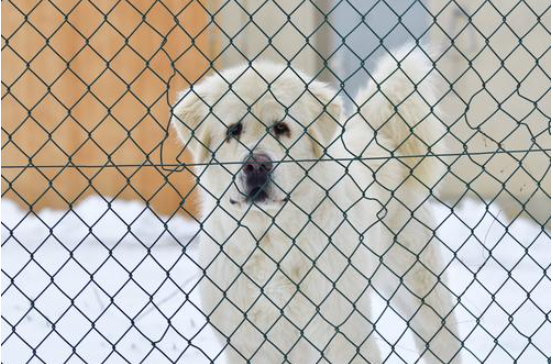



Une association de protection des animaux de notre quartier aimerait avoir une api  capable de détecter la race
des chiens à partir de son image.</br> Nous proposons en tant que des bénévoles de construire un algorithme de reconnaissance d'image afin d'accélérer leur travail d’indexation.</br> Les bénévoles de l'association n'ayant pas eu le temps de réunir les différentes images des pensionnaires dispersées sur leurs disques durs. Nous allons ainsi utiliser  la base de données de *Stanford Dogs Dataset*

Ce notebook contient le code final à déployer, le modèle final est déjà entraîné et enregistré dans le répertoire "/content/drive/MyDrive/Saved_model/" sous le nom : "fine_tune_effecientnetb3.h5".
Le même répertoire contient aussi une permutation des races encodés par keras lors de l'entrainent sous le nom  "classes.csv". 


Tous les Notebooks du projet seront versionnés dans un repositoire GitHub disponible à l'adresse: https://github.com/Bounkass/Projet_6_ML_OC

In [1]:
# python librairies
import pandas as pd
import numpy as np
import cv2 
from keras.models import load_model

In [ ]:
#install gradio pour l'api
!pip install gradio

### 1. Chargement du modèle entrainé

Nous allons chargé le modèle entrainé sur l'ensemble des données, il est basé sur le modèle préentrainé EffecientNetb3 sans la couche dense et avec une congélation de toutes les autres couches.


In [2]:
# Load model
#path = '/content/drive/MyDrive/Saved_model/
cnn_tf = load_model('Saved_model/fine_tune_effecientnetb3.h5')
cnn_tf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 10, 10, 1536)     10783535  
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 120)               61560     
                                                                 
Total params: 11,632,039
Trainable params: 848,504
Non-trainable params: 10,783,535
______________________________________

In [3]:
# Load breeds
classes_ = pd.read_csv("Saved_model/classes.csv") 
classes_.head()

,breed_name
0,Chihuahua
1,Japanese_spaniel
2,Maltese_dog
3,Pekinese
4,Shih


### 2. Api de prédiction 

Nous allons créer un script pour permettre la prédiction de la race du chien à partir d'une photo. Nous utilisons la librairie  Gradio pour importer les images et appliquer le modèle pré-entrainé  afin de retourner les cinq premières prédictions
de la race du chien figuré dans l'image importée.

In [5]:

nb_classes = classes_.shape[1]
classes = classes_.breed_name.values
# Define the full prediction function
def predict_pred(image):
    # Convert to RGB
    im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Resize image
    dim = (300, 300)
    img = cv2.resize(image, dim)
    # Equalization
    r_image, g_image, b_image = cv2.split(img)
    r_image_eq = cv2.equalizeHist(r_image)
    g_image_eq = cv2.equalizeHist(g_image)
    b_image_eq = cv2.equalizeHist(b_image)
    image_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq))
    
    # Convert modified img to array

    img_ar = image_eq.reshape((-1, 300, 300, 3))
    
    # Predictions
    prediction = cnn_tf.predict(img_ar)[0]
    breeds=[]
    # for classe in encoder.classes_:
    #  breeds.append(classe.split('-')[1])
    #prediction
    return {classes[i]: float(prediction[i]) for i in range(len(classes))}

# Construct the interface
import gradio as gr

gr.Interface(fn=predict_pred, 
             inputs=gr.Image(),
             outputs=gr.Label(num_top_classes=5)).launch(share=True)




Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://22120.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x26d47b7a8e0>,
 'http://127.0.0.1:7861/',
 'https://22120.gradio.app')

1/1 [==============================] - 1s 815ms/step
